In [3]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

import pandas as pd
from pandas.io import gbq

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive


In [4]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive
 201901-202003.csv   data   Eric_Github.zip    submission.csv
'Colab Notebooks'    eric   submission01.csv


In [5]:
import pandas as pd
from pandas.io import gbq

# import submission file in Google Drive
submission = pd.read_csv('/content/drive/My Drive/submission.csv')

In [6]:
submission.to_gbq(destination_table='jeju_data_ver1.submission', 
                  project_id='eric-dacon', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=J3q7vyZZaNmJaP279zv9eSNEuyaQW2&prompt=consent&access_type=offline
Enter the authorization code: 4/1gHV0qAwsW1NmV011muPzj3ifWVLuEoHzu7I12Q3vaUTbL9Tnbb_PZM


1it [00:02,  2.52s/it]


In [7]:
# import submission file in Google Drive
train = pd.read_csv('/content/drive/My Drive/201901-202003.csv')

# Connect to Google Cloud API and Upload DataFrame
train.to_gbq(destination_table='jeju_data_ver1.201901_202003_train', 
                  project_id='eric-dacon', 
                  if_exists='replace')

1it [08:03, 483.34s/it]


In [4]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [5]:
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

train = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.201901_202003_train` 
  LIMIT 1000
  ''').to_dataframe()

In [6]:

project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

submission = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.submission` 
  LIMIT 1000
  ''').to_dataframe()

In [7]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201903,서울,동작구,택시 운송업,강원,인제군,10s,1,1,4,32800,9
1,201904,강원,동해시,서양식 음식점업,강원,삼척시,10s,2,1,3,27800,3
2,201904,서울,서초구,버스 운송업,강원,동해시,10s,2,1,7,37600,6
3,201904,서울,중구,택시 운송업,강원,태백시,10s,1,1,3,66700,9
4,201905,강원,태백시,체인화 편의점,강원,태백시,10s,1,1,20,601750,160


In [8]:
submission.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,1,202004,강원,골프장 운영업,9.562233e+08
1,2,202004,강원,과실 및 채소 소매업,4.253982e+08
2,3,202004,강원,관광 민예품 및 선물용품 소매업,2.275100e+08
3,6,202004,강원,그외 기타 종합 소매업,1.036177e+08
4,7,202004,강원,기타 대형 종합 소매업,1.815591e+09


In [9]:
submission.groupby('CARD_SIDO_NM')['STD_CLSS_NM'].unique()

CARD_SIDO_NM
강원    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경기    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
광주    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
대구    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
대전    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
부산    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
서울    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
세종    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
울산    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
인천    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
전남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
전북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
제주    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
충남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
충북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
Name: STD_CLSS_NM, dtype: object

In [21]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [12]:
t = pd.DataFrame(train)

In [30]:
t['CARD_SIDO_NM']

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [13]:
t['CARD_SIDO_NM'].unique()

array(['서울', '강원', '경기', '인천', '경북', '부산', '제주', '전북', '충북', '전남', '대구'],
      dtype=object)

In [14]:
t['CARD_CCG_NM'].unique()

array(['동작구', '동해시', '서초구', '중구', '태백시', '평창군', '춘천시', '강릉시', '인제군',
       '과천시', '용인시 처인구', '원주시', '삼척시', '철원군', '구로구', '양구군', '양양군', '광명시',
       '용산구', '속초시', '홍천군', '정선군', '화천군', '여주시', '고성군', '횡성군', '영월군',
       '강서구', '용인시 기흥구', '시흥시', '광진구', '양천구', '가평군', '광주시', '부평구', '송파구',
       '성남시 분당구', '강남구', '칠곡군', '안양시 만안구', '해운대구', '영등포구', '제주시', '서귀포시',
       '이천시', '군산시', '음성군', '종로구', '의정부시', '보성군', '안양시 동안구', '양평군', '마포구',
       '부천시', '제천시', '수성구'], dtype=object)

In [15]:
t['STD_CLSS_NM'].unique()

array(['택시 운송업', '서양식 음식점업', '버스 운송업', '체인화 편의점', '슈퍼마켓', '기타음식료품위주종합소매업',
       '비알콜 음료점업', '한식 음식점업', '전시 및 행사 대행업', '차량용 주유소 운영업',
       '화장품 및 방향제 소매업', '피자 햄버거 샌드위치 및 유사 음식점업', '빵 및 과자류 소매업', '중식 음식점업',
       '기타 대형 종합 소매업', '기타 외국식 음식점업', '스포츠 및 레크레이션 용품 임대업', '일식 음식점업',
       '골프장 운영업', '호텔업', '그외 기타 종합 소매업', '과실 및 채소 소매업', '육류 소매업', '여관업',
       '욕탕업', '휴양콘도 운영업'], dtype=object)

In [16]:
# Visualization Library Importing 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [19]:
plt.rc('font', family='NanumBarunGothic') 

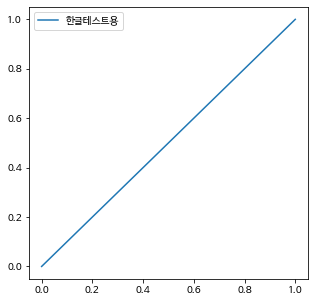

In [20]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

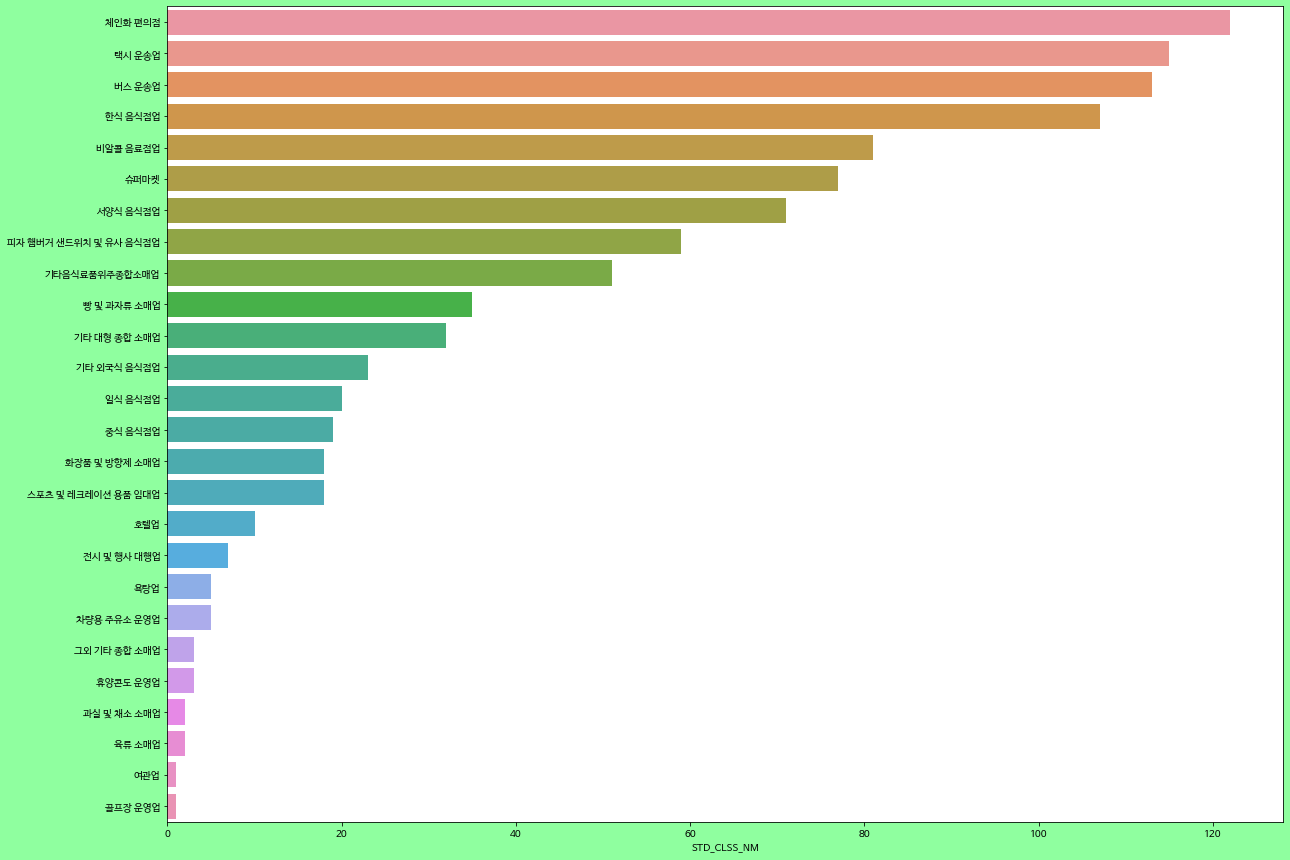

In [21]:
# 업종별 등장 빈도수 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=t['STD_CLSS_NM'].value_counts().index, x=t['STD_CLSS_NM'].value_counts())

In [22]:
city_count= train.groupby(['CARD_SIDO_NM','CARD_CCG_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,count
0,강원,강릉시,체인화 편의점,11
1,강원,강릉시,슈퍼마켓,8
2,강원,강릉시,한식 음식점업,7
3,강원,강릉시,기타 대형 종합 소매업,5
4,강원,강릉시,기타음식료품위주종합소매업,5


In [23]:
city_sum = city_count.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,골프장 운영업,1
1,강원,과실 및 채소 소매업,1
2,강원,그외 기타 종합 소매업,2
3,강원,기타 대형 종합 소매업,28
4,강원,기타 외국식 음식점업,22
